In [0]:
import re #Regular expression function
import numpy as np #Numpy array
import pandas as pd #Pandas
from sklearn.model_selection import train_test_split #Data_set_split
import matplotlib.pyplot as plt #Plotting

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [16]:
data = pd.read_csv('dataset.txt')
data = data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(50, 2)


,tweets,type
0,বাবুটা তার সাথে আবু হেবি,পজিটিভ
1,চুপ থাকার কোন সিস্টেম নাই যদি প্রান খুলে হাসতে...,নেগেটিভ
2,আমার মত প্রবাসীদে কাছ থেকে কমিশন নিয়ে একটা বিল...,পজিটিভ
3,ঈমানদারির পরিচয় পাওয়া যায় পাকিদের মূর্খতাকে সা...,নেগেটিভ
4,আবারও লেট হয়ছে সেকেন্ড মাত্র বাহ বাহ,নেগেটিভ


In [17]:
data = data[['tweets', 'type']]
data.head()


,tweets,type
0,বাবুটা তার সাথে আবু হেবি,পজিটিভ
1,চুপ থাকার কোন সিস্টেম নাই যদি প্রান খুলে হাসতে...,নেগেটিভ
2,আমার মত প্রবাসীদে কাছ থেকে কমিশন নিয়ে একটা বিল...,পজিটিভ
3,ঈমানদারির পরিচয় পাওয়া যায় পাকিদের মূর্খতাকে সা...,নেগেটিভ
4,আবারও লেট হয়ছে সেকেন্ড মাত্র বাহ বাহ,নেগেটিভ


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2455 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2477 missing from current font.
  font.set_text(s

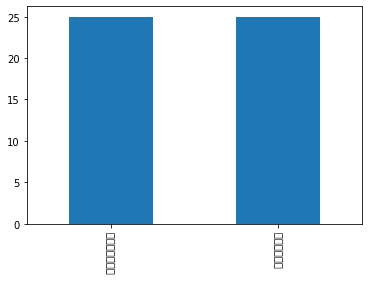

In [18]:
data['type'].value_counts().sort_index().plot.bar()

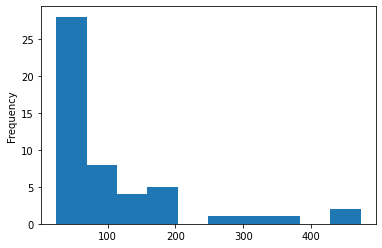

In [19]:

data['tweets'].str.len().plot.hist()

In [13]:
#data['tweets'] = data['tweets'].str.replace('@mentions', '')
#data.head()

,tweets,type
0,,পজিটিভ
1,,পজিটিভ
2,,পজিটিভ
3,,পজিটিভ
4,,নেগেটিভ


In [12]:
#data['tweets'].apply(lambda x: x.lower()) #transform text to lowercase
#data['tweets'] = data['tweets'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
#data['tweets'].head()

0              
1              
2              
3              
4              
Name: tweets, dtype: object

In [20]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['tweets'].values)

X = tokenizer.texts_to_sequences(data['tweets'].values)
X = pad_sequences(X) # Padding our text vector so they all have the same length
X[:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 138,  32,  21, 139, 140],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 141,  33,  14, 142,  68,  22,
        143, 144, 145, 146,  69, 147, 148,   6],
       [  0,   0,   0,   0

In [0]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 86, 256)           1280000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 86, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 86, 256)           525312    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 2,331,138
Trainable params: 2,331,138
Non-trainable params: 0
_________________________________________________________________


In [35]:
y = pd.get_dummies(data['type']).values
[print(data['type'][i], y[i]) for i in range(0,5)]

 পজিটিভ [0 1]
 পজিটিভ [0 1]
 পজিটিভ [0 1]
 পজিটিভ [0 1]
 নেগেটিভ [1 0]


[None, None, None, None, None]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
batch_size = 32
epochs = 8

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/8
 - 1s - loss: 0.6567 - accuracy: 0.7750
Epoch 2/8
 - 1s - loss: 0.6529 - accuracy: 0.9000
Epoch 3/8
 - 1s - loss: 0.6437 - accuracy: 0.9250
Epoch 4/8
 - 1s - loss: 0.6256 - accuracy: 0.9750
Epoch 5/8
 - 1s - loss: 0.6148 - accuracy: 1.0000
Epoch 6/8
 - 1s - loss: 0.5969 - accuracy: 0.8750
Epoch 7/8
 - 1s - loss: 0.5684 - accuracy: 0.9500
Epoch 8/8
 - 1s - loss: 0.5392 - accuracy: 0.9500


In [0]:
model.save('sentiment_analysis.h5')

In [40]:
predictions = model.predict(X_test)

[print(data['tweets'][i], predictions[i], y_test[i]) for i in range(0, 5)]

নতুন সিমে প্রথমবার টাকা রিচার্জে আপনি মিনিট বোনাস টকটাইম যেকোনো লোকাল নম্বরে জিবি ডাটা টি এসএমএস সাথে পয়সাসেকেন্ড যেকোনো গ্রামীণ নাম্বারে এবং পয়সাসেকেন্ড যেকোনো অন্য অপারেটরে অফার গুলো পাবে [0.5635812  0.43641877] [0 1]
এদেশে যতই জনসংখ্যা বেশি হোক তারপরেও জীবন বাঁচাতে আসা রোহিঙ্গাদের আশ্রয় দেওয়া উচিৎ [0.49523613 0.50476384] [1 0]
জাতিসংঘ যদি রোহিঙ্গা শরনার্থীদের পূর্নবাসনের জন্যে বাংলাদেশ সরকারকে সহায়তা করতে সম্মত হয় তাহলেই সরকারের উচিত হবে তাদের আশ্রয় দেওয়া [0.52992404 0.470076  ] [0 1]
ভাই তোমরা দুজনে মিলে চুটিয়ে প্রেম কর আর সিনামায় অভিনয় কর [0.5081608 0.4918392] [0 1]
ভাই সাংবাদিক পুলিশ যখন খারাপ কিছু করে তখন পুলিশ শাব্দ টা আগে লেখেন কিন্ত এখন এত বড় একটা ভাল কাজ করল কে গ্রেফতার করল সেটা উল্লেখ করলেন না শিরোনামে কি উল্লেখ করা উচিত ছিল না [0.5006562  0.49934372] [0 1]


[None, None, None, None, None]

In [41]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 0
Neutral predictions: 2
Negative predictions: 8
Real positive: 0
Real neutral: 6
Real negative: 4
